SIRALI KAVRAM AÇIKLAMALARI (ROL VE İLİŞKİLERLE)
1. Kullanıcı
Sistemi kullanan kişidir.

Sisteme doğal dilde bir soru / komut / ihtiyaç ile giriş yapar.

Bu giriş Chatbot aracılığıyla sisteme iletilir.

2. Chatbot (arayüz + mantık + diyaloğu yönetir)
Kullanıcıyla konuşan, arka planda LLM’le etkileşimi yöneten katmandır.

Görevi: Kullanıcının mesajını alır, uygun şekilde işler ve LLM'e yollar.

Eğer prompt engineering kullanılıyorsa, bu mesajı optimize eder.

3. Prompt Engineering (talimat tasarımı)
Kullanıcının sorusunu LLM’in anlayacağı şekilde dönüştürme sürecidir.

Chatbot’un içinde olabilir veya ayrı bir bileşen olarak çalışabilir.

LLM’e gönderilecek prompt’u hazırlayıp LLM’e verir.

4. LLM (Large Language Model)
Sistemin beyni. Üretici yapay zeka modeli.

Prompt alır, onu işler ve anlamlı bir metin (cevap) üretir.

LLM'in bilgisi yetersizse, dış kaynaklardan bilgi alması gerekir.

Bunun için LangChain gibi bir orkestrasyon sistemine bağlanır.

5. LangChain (akış yöneticisi)
LLM’in tek başına yapamayacağı işleri sıralayıp yöneten bir sistemdir.

Örn: "Soruyu özetle → ilgili belgeyi bul → cevabı üret" zincirini kurar.

LLM, LangChain üzerinden başka bileşenlere ulaşır.

6. RAG (Retrieval-Augmented Generation)
LangChain içinde çalışan bir stratejidir.

LLM, kendi bilgisi yetmediğinde, dış bilgiye ihtiyaç duyduğunda devreye girer.

Görev: Soruya en uygun bilgiyi bul ve LLM'e geri ver.

7. Embedding (metni vektöre çevirme)
Metni (dökümanı, soruyu) sayısal vektöre dönüştürür.

Amaç: Benzerlik kıyaslaması yapılabilmesi için içerikleri sayısallaştırmaktır.

Embedding'ler VectorStore'a kaydedilir.

8. VectorStore / Vector Database
Embedding’lenmiş tüm metinlerin saklandığı özel veritabanıdır.

RAG tarafından kullanılır: Soru embedding’e çevrilir, benzer içerikler bu veri tabanından çekilir.

Verilen örnekler: FAISS, Pinecone, ChromaDB.

9. Dökümanlar / Bilgi Kaynağı
Sistem tarafından kullanılabilecek her türlü yazılı içerik:

Web sayfası, pdf, e-posta, döküman, veri tabanı…

Önceden embedding'e çevrilmiş ve VectorStore'da saklanır.

Cevap üretimi sırasında bu dökümanlardan bilgi çekilir.

10. Fine-Tuning (modeli özelleştirme)
LLM’in temel haline ek eğitim verilmesi sürecidir.

Örneğin: Bir model sadece sağlık alanında iyi çalışsın diye, tıp dökümanlarıyla eğitilebilir.

Bu süreç doğrudan LLM’in içine bilgi gömmek anlamına gelir.

11. Hugging Face (açık kaynak modeller & datasetler merkezi)
Modellerin, embedding sistemlerinin, tokenizer’ların barındığı platformdur.

Açık kaynak LLM’ler ve araçlar buradan indirilebilir.

Kendi LLM altyapını kurmak istersen çok faydalıdır.

12. OpenAI
GPT-3, GPT-4 gibi modelleri geliştiren şirkettir.

API ile bu modelleri dış sistemlerin kullanımına açar.

ChatGPT, bu şirketin sunduğu bir uygulamadır.

13. Anthropic
OpenAI'nin rakibidir.

Claude adında bir LLM üretmiştir.

Aynı amaçlara hizmet eder: kullanıcıdan gelen girdilere metin üretmek.

**TÜM SİSTEM AKIŞI - “KİM KİME NE YAPAR?”**

Kullanıcı → Chatbot'a mesaj gönderir.

Chatbot → Prompt Engineering ile mesajı optimize eder.

Optimum prompt → LLM'e gider.

LLM, eğer bilgi eksikse → LangChain'e “dış kaynaktan veri getir” der.

LangChain, RAG aracılığıyla:

Kullanıcının sorusunu embedding ile vektöre çevirir.

Bu vektörü VectorStore'da tarar.

En alakalı dökümanları bulur.

Dökümanlardan gelen bilgi → LLM’e verilir.

LLM, bu bilgilerle birlikte cevabı üretir.

Chatbot, cevabı kullanıcıya gösterir.



                    ┌────────────┐
                    │  Kullanıcı │
                    └────┬───────┘
                         │
                         ▼
                  ┌────────────┐
                  │  Chatbot   │ ◄────────────┐
                  └────┬───────┘              │
                       ▼                      │
               ┌────────────────────┐         │
               │     Prompt          │         │
               │   Engineering       │◄────┐   │
               └────────┬────────────┘     │   │
                        ▼                  │   │
               ┌────────────────────┐      │   │
               │       LLM          │◄─────┘   │
               │ (GPT-4, Claude vb) │          │
               └────┬───────────────┘          │
                    │                          │
       ┌────────────▼────────────┐             │
       │       LangChain         │◄────────────┘
       │ (LLM akışı zincirleme) │
       └────────┬────────────────┘
                ▼
        ┌────────────────────────┐
        │     RAG Yapısı         │ ◄────────────┐
        │ (Veri + Cevap sentezi) │              │
        └────────┬───────────────┘              │
                 ▼                              │
        ┌────────────────────────┐              │
        │      VectorStore       │◄─┐           │
        │ (FAISS, Pinecone vb.) │  │            │
        └────┬───────────────────┘  │            │
             ▼                      │            │
      ┌─────────────────────┐      │            │
      │     Embedding       │◄─────┘            │
      │ (Metin → Vektör)    │                   │
      └────┬────────────────┘                   │
           ▼                                    │
    ┌────────────────────┐                     ▼
    │   Dokümanlar / Bilgi│ ◄────── Veri kaynakları
    └────────────────────┘
           ▲
           │
┌────────────────────────┐
│   Hugging Face         │  ◄─ Modellerin / Datasetlerin pazarı
│ (Transformers lib. vb) │
└────────────────────────┘
           ▲
           │
┌────────────┬────────────┐
│  OpenAI    │  Anthropic │ ◄────► LLM geliştirici şirketler
└────────────┴────────────┘
           ▲
           │
 ┌────────────────────────┐
 │  Fine-Tuning (Opsiyonel)│  ◄─ Modeli özel veriye göre eğitme
 └────────────────────────┘


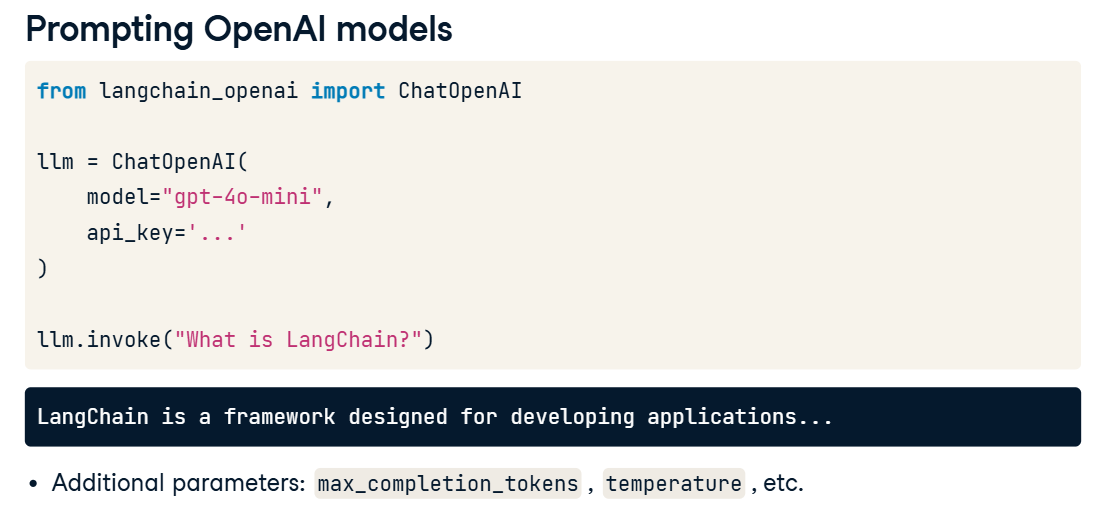

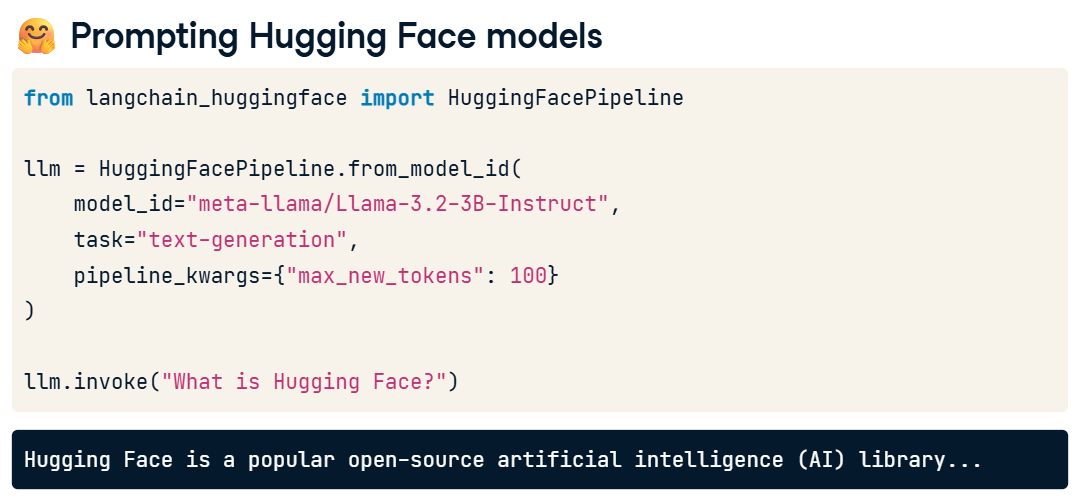

In [ ]:
# Define the LLM
llm = ChatOpenAI(model="gpt-4o-mini", api_key="<OPENAI_API_TOKEN>")

# Predict the words following the text in question
prompt = 'Three reasons for using LangChain for LLM application development.'
response = llm.invoke(prompt)

print(response.content)

In [ ]:
# Import the class for defining Hugging Face pipelines
from langchain_huggingface import HuggingFacePipeline

# Define the LLM from the Hugging Face model ID
llm = HuggingFacePipeline.from_model_id(
    model_id="crumb/nano-mistral",
    task="text-generation",
    pipeline_kwargs={"max_new_tokens": 20}
)

prompt = "Hugging Face is"

# Invoke the model
response = llm.invoke(prompt)
print(response)

🔗 ÖRNEK ZİNCİR:
Konu: Bir şirketteki yeni ürün lansmanı hakkında bilgi istemek

📍 1. Kullanıcı Sorusu
❓“Eker’in 2024’te çıkardığı yeni ürün hangisiydi ve özellikleri nelerdi?”

⚙️ 2. Chatbot Devreye Girer
Bu mesajı alır ve yapay zekaya gönderilecek şekle dönüştürür:
“Eker’in 2024 ürün lansmanı nedir ve teknik özellikleri nelerdir? Belgelerden bilgi gerekiyorsa çek.”

🧠 3. LLM (örneğin GPT-4)
LLM soruya bakar ve der ki:
“Ben Eker’in 2024 ürün bilgilerine sahip değilim. Eğitim verimde bu bilgi yok.”
O yüzden şunu yapar:
➡️ LangChain'e sinyal gönderir: “RAG çalıştır!”

🔄 4. LangChain - Zinciri Başlatır
LangChain, birden fazla adımı sıraya koyar:

Adım	Ne yapılır?
1️⃣	Soru embedding yapılır (sayısal vektöre çevrilir)
2️⃣	Bu embedding, VectorStore içinde taranır
3️⃣	En alakalı belgeler seçilir (örneğin: “Eker Ürün Lansman Raporu - 2024 Mart”)
4️⃣	Bu belge içinden ilgili paragraf çıkarılır

📚 5. VectorStore & Embedding
“Eker 2024 ürün lansmanı” ile eşleşen embedding’li dökümanlar taranır.

Aşağıdaki içerik çıkarılır:

“Yeni ürün: Eker SmartFit Yoğurt, Mart 2024’te pazara sunuldu.
Özellikleri: Probiyotik destekli, şeker ilavesiz, çevre dostu ambalaj.”

🧠 6. LLM Cevabı Üretir
LLM bu içeriği alır ve kullanıcıya özet bir cevap üretir:

🟢 “Eker 2024 yılında SmartFit Yoğurt adlı ürünü piyasaya sürmüştür.
Bu ürün probiyotik desteklidir, şeker içermez ve çevre dostu ambalajla sunulmuştur.”

💬 7. Chatbot Son Cevabı Gönderir
Bu yanıt kullanıcıya gösterilir.
LLM ayrıca şunu da ekleyebilir:

“Bu bilgi Eker Ürün Lansman Raporu - 2024 Mart belgesinden alınmıştır.”





🧭 1. MODEL GELİŞTİRME ve EĞİTİM KÜMESİ
Bu küme, bir LLM’in doğduğu, eğitildiği ve özelleştirildiği yerdir.

📌 Ana kavramlar:
LLM (Large Language Model)

Fine-Tuning

Pretraining

Dataset

Hugging Face

| Kavram           | Görevi                                                                                                                        |
| ---------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **LLM**          | Eğitilen büyük dil modelidir. (örnek: GPT-4, Claude, LLaMA)                                                                   |
| **Pretraining**  | Modelin genel dil bilgisi ve dünya bilgisini öğrenme aşamasıdır.                                                              |
| **Fine-Tuning**  | Önceden eğitilmiş bir LLM’in **özelleştirilmesi** işlemidir. Örneğin, müşteri hizmetleri için özel cevaplar üretmesi istenir. |
| **Dataset**      | Modelin eğitildiği veridir. Metin, döküman, diyalog gibi örnekleri içerir.                                                    |
| **Hugging Face** | Açık kaynak LLM’lerin, datasetlerin ve eğitim araçlarının barındığı platformdur. “Model pazarı” gibi düşünebilirsin.          |


 2. MODEL ENTEGRASYON ve ZİNCİRLEME KÜMESİ
Bu küme, LLM’i kullanarak sistemin geri kalanına bağladığımız ve görevler tanımladığımız yerdir.

📌 Ana kavramlar:
LangChain

Prompt Engineering

Agent / Chain

RAG (Retrieval-Augmented Generation)

| Kavram                 | Görevi                                                                                  |
| ---------------------- | --------------------------------------------------------------------------------------- |
| **LangChain**          | LLM'i farklı adımlar (belge çekme, özetleme, karar verme) ile zincirleme sistemi kurar. |
| **Prompt Engineering** | LLM’e etkili ve net talimat vermek için prompt tasarımı yapılır.                        |
| **Chain**              | “Önce A’yı yap, sonra B’yi, sonra sonucu döndür” şeklinde adımlar.                      |
| **Agent**              | Karar verebilen akıllı bir LangChain aktörüdür. Gerekli zinciri kendi seçer.            |
| **RAG**                | LLM’in dış bilgiye ihtiyacı olduğunda, onu dış veriden getirip eklemesini sağlar.       |


🧠 3. BİLGİ DEPOLAMA ve VERİ ARAMA KÜMESİ
Bu küme, sistemin "hafızasını" ve bilgiye erişim yollarını içerir.

📌 Ana kavramlar:
Embedding

VectorStore / Vector DB

Document Store

FAISS / Pinecone / Weaviate / ChromaDB

| Kavram               | Görevi                                                                      |
| -------------------- | --------------------------------------------------------------------------- |
| **Embedding**        | Metinleri sayısal vektörlere çevirir (benzerlik karşılaştırması için).      |
| **VectorStore**      | Bu vektörleri saklayan veritabanıdır. LLM, burada bilgi arar.               |
| **Document Store**   | Belgelerin orijinal halleri tutulur. Genelde VectorStore ile bağlantılıdır. |
| **FAISS / Pinecone** | En popüler vektör veri tabanları. Dıştan bağlantıyla bilgi aranır.          |


💬 4. KULLANICI ARAYÜZÜ ve UYGULAMA KÜMESİ
Bu küme, kullanıcıyla sistemin buluştuğu yerdir.

📌 Ana kavramlar:
Chatbot

ChatGPT

Claude

Bard / Gemini

API / SDK

| Kavram               | Görevi                                                                          |
| -------------------- | ------------------------------------------------------------------------------- |
| **Chatbot**          | Kullanıcıyla etkileşimi yöneten uygulamadır.                                    |
| **ChatGPT / Claude** | LLM’e dayalı gerçek chatbot örnekleridir.                                       |
| **API**              | Başka uygulamaların bu modellere bağlanmasını sağlar.                           |
| **SDK**              | Geliştiriciler için sunulan araç paketleri. Uygulama inşa etmeyi kolaylaştırır. |


🔐 5. MODEL SAĞLAYICILARI (ÜRETİCİ FİRMALAR)
Bu küme, modelleri geliştiren ve sunan firmaları kapsar.

📌 Ana kavramlar:
OpenAI

Anthropic

Meta (LLaMA)

Mistral / Cohere / Google DeepMind

| Firma               | Ne Sağlar?                             |
| ------------------- | -------------------------------------- |
| **OpenAI**          | GPT serisi modeller (GPT-3.5, GPT-4)   |
| **Anthropic**       | Claude modeli (güvenli ve etik odaklı) |
| **Meta**            | LLaMA açık kaynak modelleri            |
| **Google DeepMind** | Gemini (eski adı Bard)                 |
| **Mistral**         | Açık kaynak küçük ama güçlü LLM'ler    |


| KÜME                     | Ana Görev                              |
| ------------------------ | -------------------------------------- |
| **1. Model Geliştirme**  | Modelin eğitilmesi ve özelleştirilmesi |
| **2. Zincirleme & Akış** | LLM görevlerinin planlanması           |
| **3. Veri & Hafıza**     | Bilginin saklanması ve getirilmesi     |
| **4. Uygulama Katmanı**  | Kullanıcıyla etkileşim                 |
| **5. Model Üreticileri** | Bu modelleri inşa eden firmalar        |


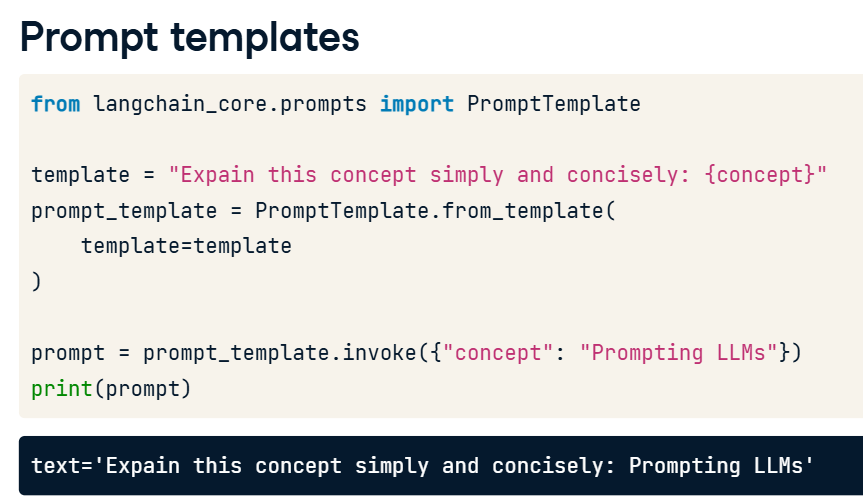

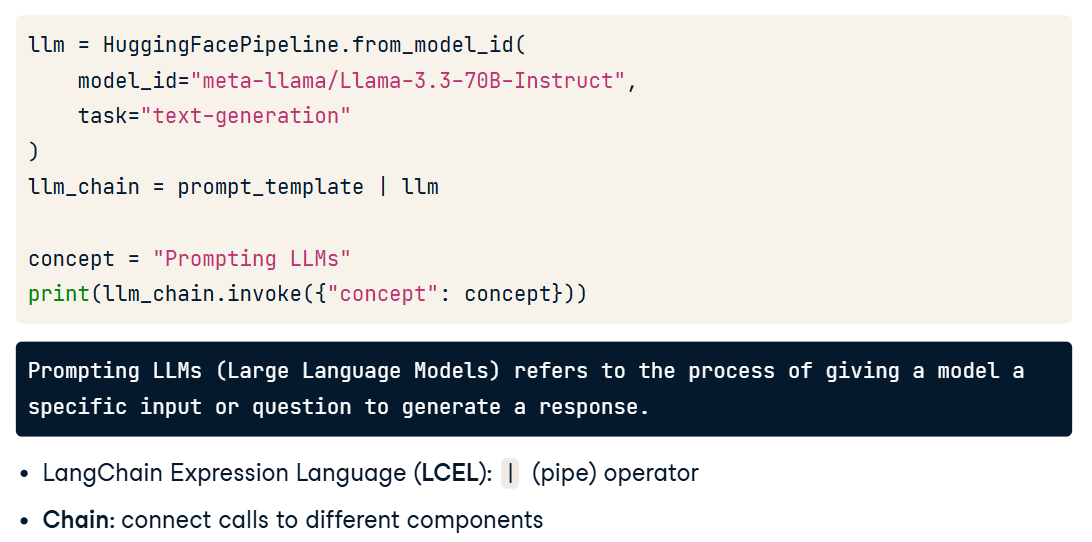

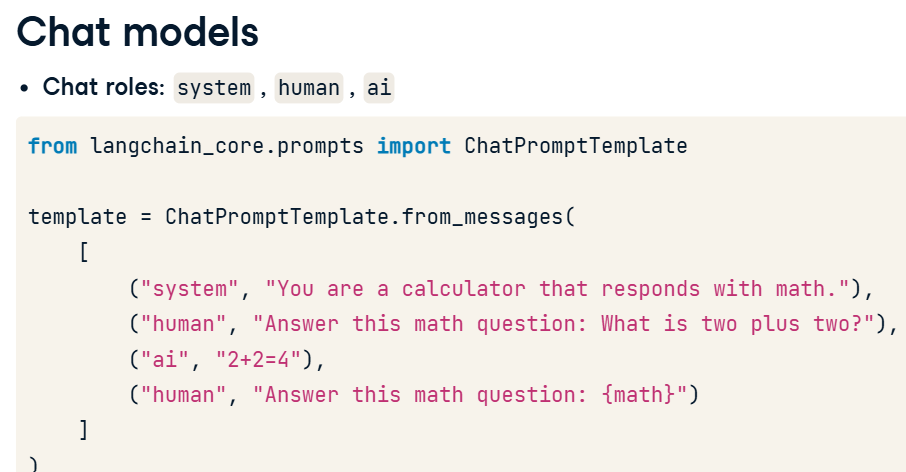

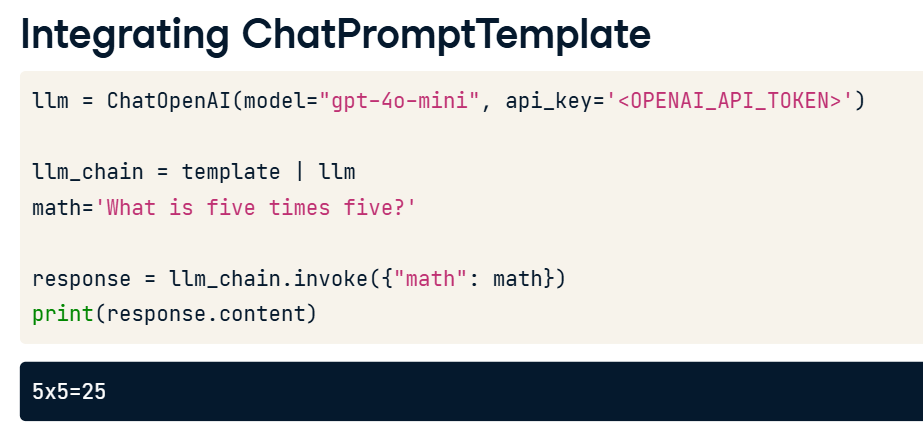

In [ ]:
# Create a prompt template from the template string
template = "You are an artificial intelligence assistant, answer the question. {question}"
prompt = PromptTemplate.from_template(
    template=template
)

llm = ChatOpenAI(model="gpt-4o-mini", api_key='<OPENAI_API_TOKEN>')

# Create a chain to integrate the prompt template and LLM
llm_chain = prompt | llm

# Invoke the chain on the question
question = "How does LangChain make LLM application development easier?"
print(llm_chain.invoke({"question": question}))

In [ ]:
llm = ChatOpenAI(model="gpt-4o-mini", api_key='<OPENAI_API_TOKEN>')

# Create a chat prompt template
prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a geography expert that returns the colors present in a country's flag."),
        ("human", "France"),
        ("ai", "blue, white, red"),
        ("human", "{country}")
    ]
)

# Chain the prompt template and model, and invoke the chain
llm_chain = prompt_template | llm

country = "Japan"
response = llm_chain.invoke({"country": country})
print(response.content)

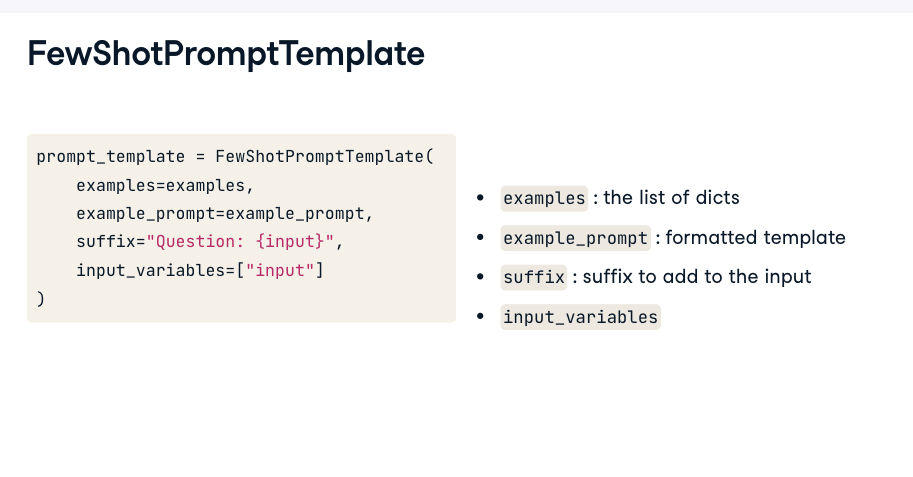

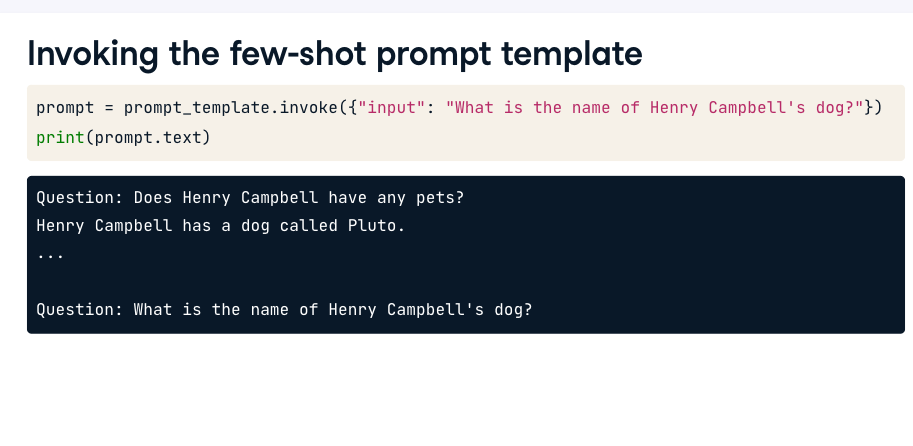

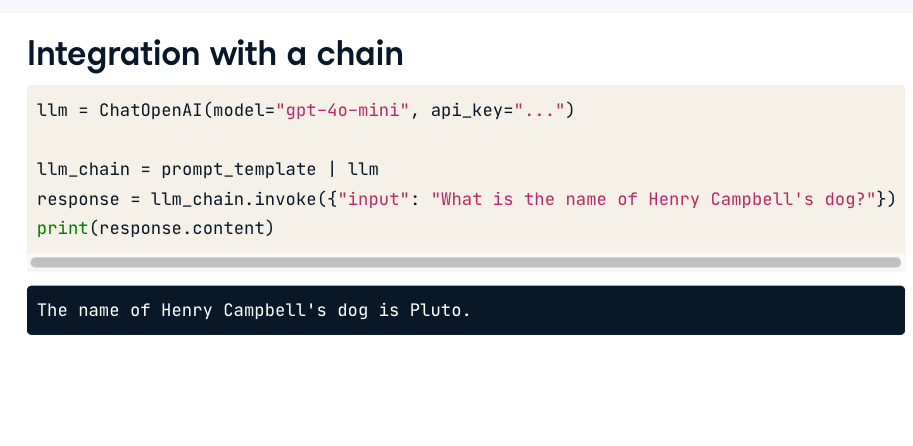

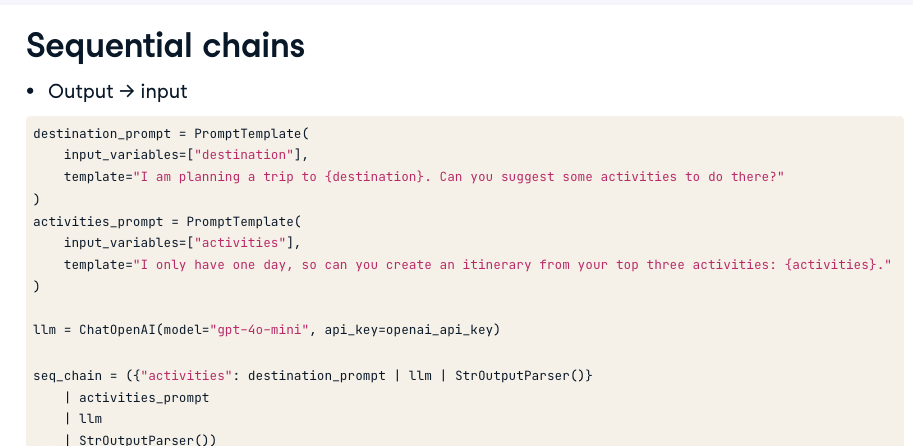

In [ ]:
# Complete the prompt for formatting answers
example_prompt = PromptTemplate.from_template("Question: {question}\n{answer}")

# Create the few-shot prompt
prompt_template = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="Question: {input}",
    input_variables=["input"],
)

prompt = prompt_template.invoke({"input": "What is Jack's favorite technology on DataCamp?"})
print(prompt.text)

In [ ]:
prompt_template = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="Question: {input}",
    input_variables=["input"],
)

# Create an OpenAI chat LLM
llm = ChatOpenAI(model="gpt-4o-mini", api_key='<OPENAI_API_TOKEN>')

# Create and invoke the chain
llm_chain = prompt_template | llm
print(llm_chain.invoke({"input": "What is Jack's favorite technology on DataCamp?"}))

In [ ]:
# Create a prompt template that takes an input activity
learning_prompt = PromptTemplate(
    input_variables=["activity"],
    template="I want to learn how to {activity}. Can you suggest how I can learn this step-by-step?"
)

# Create a prompt template that places a time constraint on the output
time_prompt = PromptTemplate(
    input_variables=["learning_plan"],
    template="I only have one week. Can you create a plan to help me hit this goal: {learning_plan}."
)

# Invoke the learning_prompt with an activity
print(learning_prompt.invoke({"activity": "play golf"}))

In [ ]:
learning_prompt = PromptTemplate(
    input_variables=["activity"],
    template="I want to learn how to {activity}. Can you suggest how I can learn this step-by-step?"
)

time_prompt = PromptTemplate(
    input_variables=["learning_plan"],
    template="I only have one week. Can you create a concise plan to help me hit this goal: {learning_plan}."
)

# Complete the sequential chain with LCEL
seq_chain = ({"learning_plan": learning_prompt | llm | StrOutputParser()}
    | time_prompt
    | llm
    | StrOutputParser())

# Call the chain
print(seq_chain.invoke({"activity": "play the harmonica"}))